In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA.

In [106]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [107]:
df.head(6)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71


In [108]:
df['Physical_Activity'].value_counts()

Physical_Activity
3    2545
2    1627
4    1575
1     421
5     361
0      46
6      32
Name: count, dtype: int64

In [109]:
df['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [70]:
def group(x):
    if x > 90:
        return 'A'
    
    if x > 80:
        return 'B'
    
    if x > 70:
        return 'C'
    
    if x > 60:
        return 'D'
    
    else:
        return 'F'
    
def groupnum(x):
    if x > 90:
        return 1
    
    if x > 80:
        return 2
    
    if x > 70:
        return 3
    
    if x > 60:
        return 4
    
    else:
        return 5
    
df['Exam_Score'] = df['Exam_Score'].map(groupnum)
    


In [71]:
df = df[['Hours_Studied', 'Attendance', 'Access_to_Resources', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Teacher_Quality', 'Gender', 'Exam_Score']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hours_Studied        6607 non-null   int64 
 1   Attendance           6607 non-null   int64 
 2   Access_to_Resources  6607 non-null   object
 3   Sleep_Hours          6607 non-null   int64 
 4   Previous_Scores      6607 non-null   int64 
 5   Motivation_Level     6607 non-null   object
 6   Teacher_Quality      6529 non-null   object
 7   Gender               6607 non-null   object
 8   Exam_Score           6607 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 464.7+ KB


In [72]:
df['Access_to_Resources'].value_counts()

Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

In [73]:
df['Motivation_Level'].value_counts()

Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

In [74]:
df['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

In [75]:
df['Gender'].value_counts()

Gender
Male      3814
Female    2793
Name: count, dtype: int64

## Transform categorical values into numerical

In [76]:
def transform(x):
    if x == 'High':
        return 3
    
    if x == 'Medium':
        return 2
    
    if x == 'Low':
        return 1
    
    else:
        return 2.5
    
df['Access_to_Resources'] = df['Access_to_Resources'].map(transform)
df['Motivation_Level'] = df['Motivation_Level'].map(transform)
df['Teacher_Quality'] = df['Teacher_Quality'].map(transform)
df['Gender'] = df['Gender'].map(lambda x: 1 if x == 'Male' else 0)


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours_Studied        6607 non-null   int64  
 1   Attendance           6607 non-null   int64  
 2   Access_to_Resources  6607 non-null   int64  
 3   Sleep_Hours          6607 non-null   int64  
 4   Previous_Scores      6607 non-null   int64  
 5   Motivation_Level     6607 non-null   int64  
 6   Teacher_Quality      6607 non-null   float64
 7   Gender               6607 non-null   int64  
 8   Exam_Score           6607 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 464.7 KB


<Axes: ylabel='Density'>

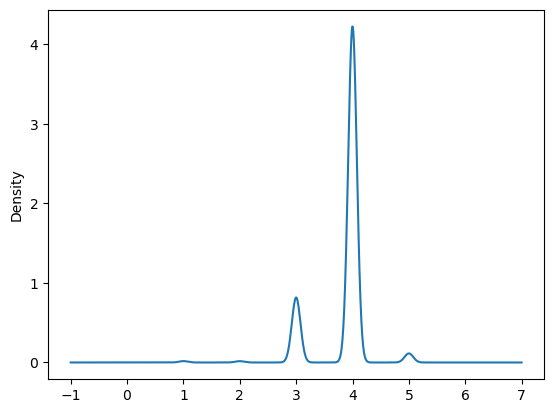

In [78]:
# Distribution of the exam scores is not uniform
df['Exam_Score'].plot.kde()

<Axes: ylabel='Density'>

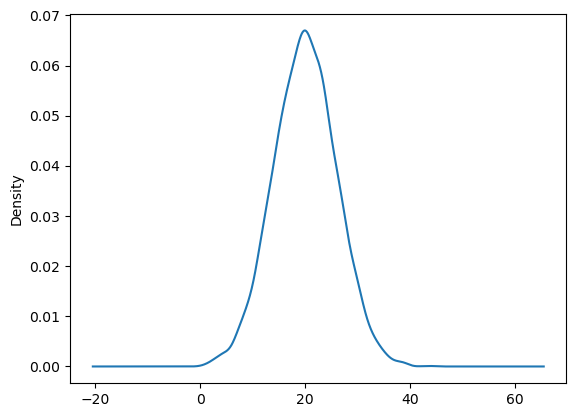

In [79]:
df['Hours_Studied'].plot.kde()

# Correlations and Feature Selection

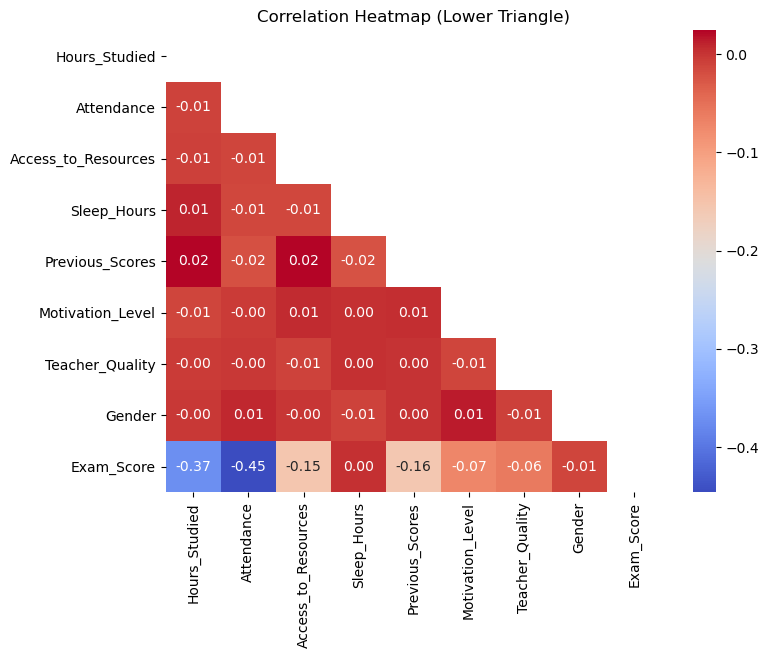

In [80]:
# We will check the correlations with spearmans correlation for non-linear relations
correlation_matrix = df.corr('spearman')
# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap with mask
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

In [81]:
# Motivation Level * Teacher Quality
df['MoXTe'] = (df['Motivation_Level'] * df['Teacher_Quality'])

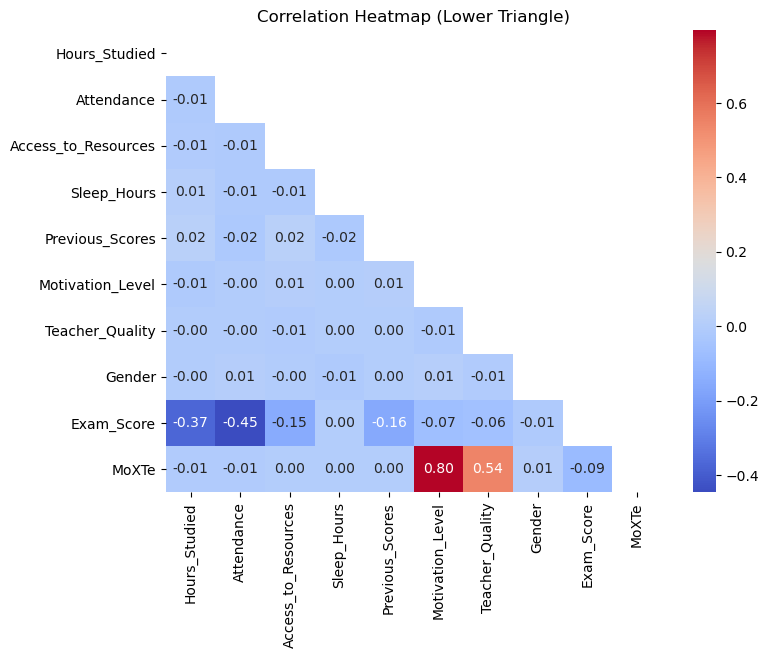

In [82]:
# Check again after adding the new engineered feature
correlation_matrix = df.corr('spearman')
# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap with mask
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

In [83]:
df.drop(labels = ['Sleep_Hours', 'Gender', 'MoXTe'],inplace = True, axis = 1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours_Studied        6607 non-null   int64  
 1   Attendance           6607 non-null   int64  
 2   Access_to_Resources  6607 non-null   int64  
 3   Previous_Scores      6607 non-null   int64  
 4   Motivation_Level     6607 non-null   int64  
 5   Teacher_Quality      6607 non-null   float64
 6   Exam_Score           6607 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 361.4 KB


# Preprocessing

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imb_pipline

X, y = df[df.columns[:-1]], df['Exam_Score']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = 420)

In [86]:
# Over sampling to handle the imbalance of exam scores
smote = SMOTE(k_neighbors = 4, n_jobs = -1, random_state = 420)

x_train, y_train = smote.fit_resample(x_train, y_train)

/Users/shadyali/anaconda3/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<Axes: ylabel='Density'>

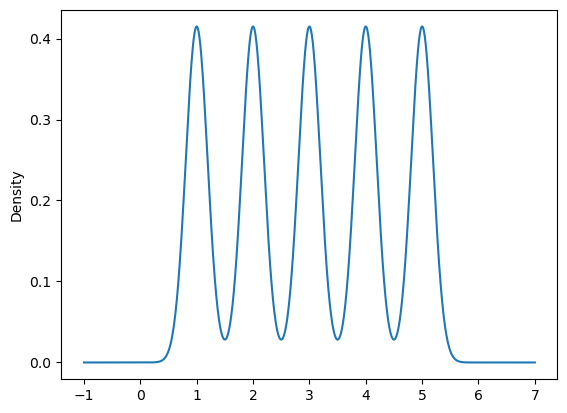

In [87]:
y_train.plot.kde()

In [88]:
scaler = RobustScaler()
x_train[x_train.columns], x_test[x_test.columns] = scaler.fit_transform(x_train), scaler.transform(x_test)

# Modeling

## Random Forest

In [89]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, random_state = 420, n_estimators = 200)

rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=420)

In [91]:
y_hat = rf.predict(x_test)

mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  -0.40929151653412355
MSE:  0.30257186081694404
MAE:  0.19213313161875945


## Gradient Boost

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [93]:
y_hat = gb.predict(x_test)

mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  -1.6001428480054578
MSE:  0.5582450832072617
MAE:  0.3071104387291982


## SGD

In [94]:
from sklearn.linear_model import SGDRegressor, SGDClassifier

sgd = SGDClassifier()

sgd.fit(x_train, y_train)

SGDClassifier()

In [97]:
y_hat = sgd.predict(x_test)

mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  -14.29785941197791
MSE:  3.2844175491679275
MAE:  1.4175491679273828


## KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [104]:
y_hat = knn.predict(x_test)

mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  -0.9307293776517493
MSE:  0.4145234493192133
MAE:  0.2586989409984871
